# Prediction task to determine whether a person makes over 50K a year.

For this project we will be using the University of California, Irvine Adult Data Set. I will be predicting if the people in this dataset belong in a certian class of salary, either making <=50k or >50k per year.

This project involves data cleaning, feature engineering, exploratory data analysis and a prediction task with log regression.


**age:** continuous.

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num:** continuous.

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex:** Female, Male.

**capital-gain:** continuous.

**capital-loss:** continuous.

**hours-per-week:** continuous.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Review

Concatenating two dataframes into one.

In [2]:
dta1 = pd.read_csv(r'C:\Users\Newton\Desktop\DA\Python Data\adult.csv')
dta2 = pd.read_csv(r'C:\Users\Newton\Desktop\DA\Python Data\adult2.csv')

In [3]:
df = pd.concat([dta1,dta2], axis=0)

In [4]:
df.head(5)

,Age,WorkClass,Fnlwgt,Education,EducationNum,Marital-Status,Occuptaion,Relationship,Race,Gender,Capital-Gain,Capital-Loss,WorkHours per week,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 48842 non-null  int64 
 1   WorkClass           48842 non-null  object
 2   Fnlwgt              48842 non-null  int64 
 3   Education           48842 non-null  object
 4   EducationNum        48842 non-null  int64 
 5   Marital-Status      48842 non-null  object
 6   Occuptaion          48842 non-null  object
 7   Relationship        48842 non-null  object
 8   Race                48842 non-null  object
 9   Gender              48842 non-null  object
 10  Capital-Gain        48842 non-null  int64 
 11  Capital-Loss        48842 non-null  int64 
 12  WorkHours per week  48842 non-null  int64 
 13  NativeCountry       48842 non-null  object
 14  Income              48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


## Dealing with Missing Data

Checking for missing values in columns.

In [6]:
df.isna().sum()

Age                   0
WorkClass             0
Fnlwgt                0
Education             0
EducationNum          0
Marital-Status        0
Occuptaion            0
Relationship          0
Race                  0
Gender                0
Capital-Gain          0
Capital-Loss          0
WorkHours per week    0
NativeCountry         0
Income                0
dtype: int64

This dataset seem to be free of null values.

## Data Cleaning

In [7]:
# Looking at unique values for errors
#df['Age'].sort_values()
#df['EducationNum'].unique()
#df['Marital-Status'].unique()
#df['Occuptaion'].unique()
#df['WorkClass'].unique()
#df['Gender'].unique()
#df['NativeCountry'].unique()
#df['Education'].unique()

###### Replacing space on left of values

In [8]:
columns = ['WorkClass', 'Education','Marital-Status', 'Occuptaion', 'Relationship', 'Race', 'Gender','Income','NativeCountry']
df[columns] = df[columns].apply(lambda x: x.str.strip())

###### Removing '.'  from "Income" column

In [9]:
df['Income']= df['Income'].str.replace(".","")

## Feature Engineering

###### Grouping country by continent

In [10]:
df['NativeCountry'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [11]:
North_America = ['Canada','Outlying-US(Guam-USVI-etc)','United-States']
Latin_South_America = ['Cuba','Mexico','Jamaica','Honduras','Trinadad&Tobago','Columbia','Ecuador','Peru','Guatemala','Nicaragua','Puerto-Rico','Dominican-Republic','Haiti','El-Salvador']
Asia = ['Philippines','South','India','Iran','Cambodia','Thailand','Laos''China','Japan','Vietnam', 'Hong','Taiwan','China','Laos']
Europe = ['England','Germany','Italy', 'Poland','Portugal','France','Yugoslavia','Greece','Scotland','Ireland', 'Hungary','Holand-Netherlands']

In [12]:
df.loc[df.NativeCountry.isin(North_America),'NativeCountry'] = 'North_America'
df.loc[df.NativeCountry.isin(Latin_South_America),'NativeCountry'] = 'Latin_South_America'
df.loc[df.NativeCountry.isin(Asia),'NativeCountry'] = 'Asia'
df.loc[df.NativeCountry.isin(Europe),'NativeCountry'] = 'Europe'

In [13]:
df.rename(columns={"NativeCountry": "NativeRegion"},inplace=True)

In [14]:
df["NativeRegion"].unique()

array(['North_America', 'Latin_South_America', 'Asia', '?', 'Europe'],
      dtype=object)

###### Changing the ages into generations

In [15]:
df['Age'].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90], dtype=int64)

In [16]:
# According to the Pew Research Group these are the age groups by generations.
genz = [17, 18, 19, 20, 21, 22, 23, 24]
mill = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38] 
genx = [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,]
boomer = [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
silent = [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

In [17]:
df.loc[df.Age.isin(genz),'Generation']='Gen Z'
df.loc[df.Age.isin(mill),'Generation']='Millenial'
df.loc[df.Age.isin(genx),'Generation']='Gen X'
df.loc[df.Age.isin(boomer),'Generation']='Boomer'
df.loc[df.Age.isin(silent),'Generation']='Silent'

###### Combining similar columns

In [18]:
BelowHS = ['10th','11th','12th','1st-4th','5th-6th','7th-8th','9th','Preschool']
Assoc = ['Assoc-acdm', 'Assoc-voc']
hsgrad=['Some-college']

In [19]:
df.loc[df.Education.isin(BelowHS),'Education'] = 'BelowHS'
df.loc[df.Education.isin(Assoc),'Education'] ='Assoc'
df.loc[df.Education.isin(hsgrad),'Education'] ='HS-grad'

In [20]:
df = df.drop(columns = ['Age','EducationNum','Fnlwgt'])

In [21]:
df['Education'].unique()

array(['Bachelors', 'HS-grad', 'BelowHS', 'Masters', 'Assoc', 'Doctorate',
       'Prof-school'], dtype=object)

##### Marital Staus into 'Never-married', 'Married', 'Not_Married'

In [22]:
df['Marital-Status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [23]:
Married = ['Married-spouse-absent','Married-AF-spouse','Married-civ-spouse']
Not_Married =['Separated','Widowed','Divorced']

In [24]:
df.loc[df['Marital-Status'].isin(Married),'Marital-Status']='Married'
df.loc[df['Marital-Status'].isin(Not_Married),'Marital-Status']='Not_Married'

#####  Work Class

In [25]:
gov = ['State-gov','Local-gov','Federal-gov']
unemployed =['Without-pay','Never-worked']
self =['Self-emp-not-inc','Self-emp-inc']

In [26]:
df.loc[df.WorkClass.isin(gov),'WorkClass']='Government'
df.loc[df.WorkClass.isin(unemployed),'WorkClass']='Unemployed'
df.loc[df.WorkClass.isin(self),'WorkClass']='Self-emp'

In [27]:
df['WorkClass'].unique()

array(['Government', 'Self-emp', 'Private', '?', 'Unemployed'],
      dtype=object)

###### Capital gain/ loss into yes or no values

In [28]:
df.loc[df['Capital-Loss']!=0,'Capital-Loss'] = 'Yes'
df.loc[df['Capital-Loss']!='Yes','Capital-Loss'] = 'No'

In [29]:
df.loc[df['Capital-Gain']!=0,'Capital-Gain'] = 'Yes'
df.loc[df['Capital-Gain']!='Yes','Capital-Gain'] = 'No'

###### In the columns I want to change the values labled "?" into nan values and drop them.

In [30]:
df.replace('?',np.nan,inplace=True)

In [31]:
df.isna().sum()

WorkClass             2799
Education                0
Marital-Status           0
Occuptaion            2809
Relationship             0
Race                     0
Gender                   0
Capital-Gain             0
Capital-Loss             0
WorkHours per week       0
NativeRegion           857
Income                   0
Generation               0
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

WorkClass             0
Education             0
Marital-Status        0
Occuptaion            0
Relationship          0
Race                  0
Gender                0
Capital-Gain          0
Capital-Loss          0
WorkHours per week    0
NativeRegion          0
Income                0
Generation            0
dtype: int64

###### Changing varaible types

In [34]:
col = ['WorkClass','Education', 'Marital-Status', 'Occuptaion','Relationship', 'Race', 'Gender', 'Capital-Gain', 'Capital-Loss','NativeRegion', 'Income', 'Generation']

In [35]:
df[col] = df[col].apply(lambda x: x.astype('category'))

## Exploratory Data Analysis

### What is the Income per Native Region?

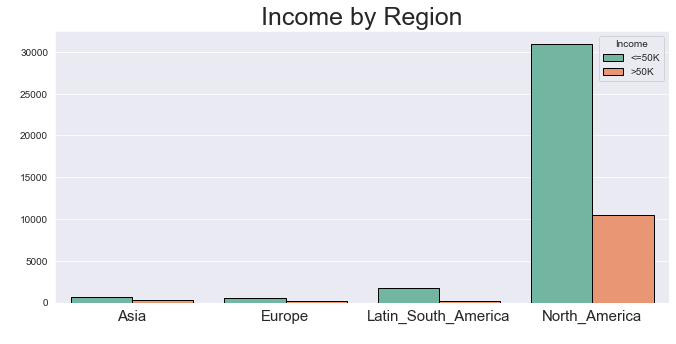

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(11,5))

ax = sns.countplot(x ='NativeRegion',data=df, hue='Income', edgecolor = 'k',palette='Set2')
ax.set_title("Income by Region", fontsize=25)

plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize= 15)
plt.show()

We can see for the native regions that most of the population sample is making less than 50k.

### What is the education level by generation?

In [37]:
newdf = df.groupby(['Generation','Education']).count().reset_index()

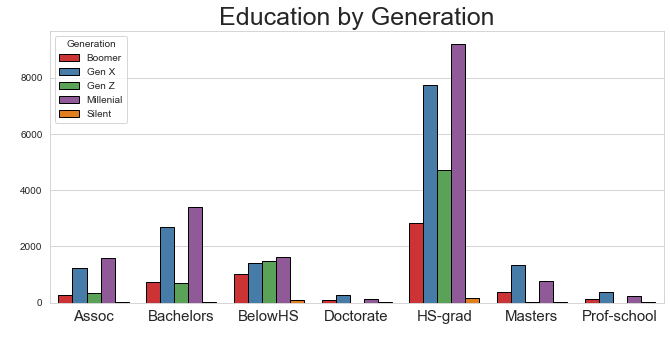

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,5))

ax = sns.barplot(x =newdf['Education'], y=newdf['Income'], hue=newdf['Generation'], edgecolor = 'k',palette='Set1')
ax.set_title("Education by Generation", fontsize=25)

plt.ylabel(" ")
plt.xlabel(" ")
plt.xticks(fontsize= 15)
plt.show()

From this we can see that who fall in the millenial and gen z category tend to do better in graduating highschool and going to college than those in other age groups. 

However, we have to keep in mind that some groups maybe over/under represented in these categories. For instance, gen z includes 17 year old who may have not graudated high school yet. In addition, there maybe fewer people who live in the silent generation.

In [39]:
df.head()

,WorkClass,Education,Marital-Status,Occuptaion,Relationship,Race,Gender,Capital-Gain,Capital-Loss,WorkHours per week,NativeRegion,Income,Generation
0,Government,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Yes,No,40,North_America,<=50K,Gen X
1,Self-emp,Bachelors,Married,Exec-managerial,Husband,White,Male,No,No,13,North_America,<=50K,Gen X
2,Private,HS-grad,Not_Married,Handlers-cleaners,Not-in-family,White,Male,No,No,40,North_America,<=50K,Millenial
3,Private,BelowHS,Married,Handlers-cleaners,Husband,Black,Male,No,No,40,North_America,<=50K,Gen X
4,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,No,No,40,Latin_South_America,<=50K,Millenial


### What is the income compared to education levels, generation, race, and gender?

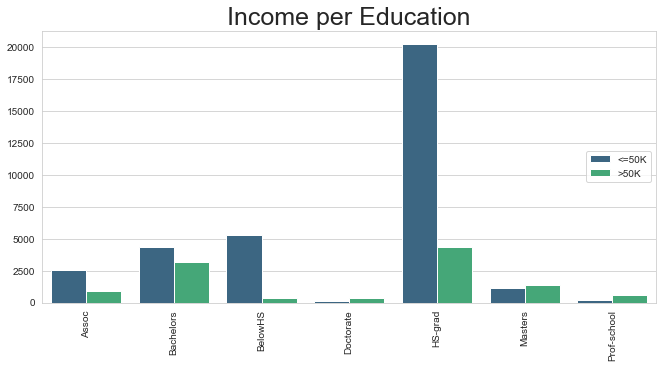

In [40]:
fig = plt.figure(figsize = (11,5))
ax=sns.countplot(data =df, x= 'Education', hue = 'Income',palette='viridis')
ax.set_title('Income per Education', fontsize=25)

plt.xlabel("Education",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='right')
plt.show()

We can see from this graph that those with highschool and below high school education are disproportionately reprsented by those who make less than 50k.

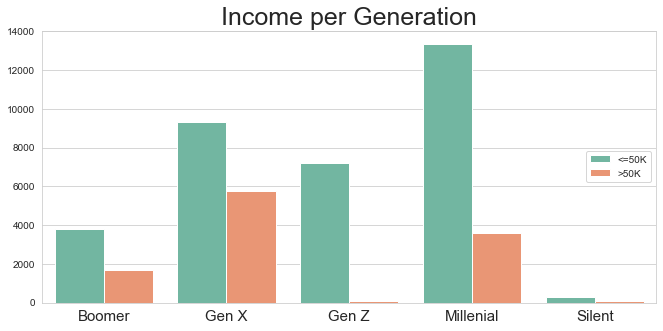

In [41]:
fig = plt.figure(figsize = (11,5))
ax=sns.countplot(data=df, x='Generation', hue = 'Income',palette='Set2')
ax.set_title('Income per Generation', fontsize=25)

plt.xlabel("Education",fontsize = 14);
plt.xticks(fontsize=15)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='right')
plt.show()

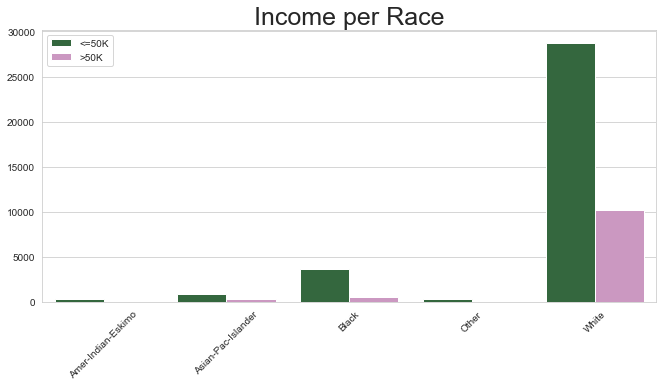

In [42]:
fig = plt.figure(figsize = (11,5))
ax=sns.countplot(data= df, x='Race', hue = 'Income',palette="cubehelix")
ax.set_title('Income per Race', fontsize=25)

plt.xlabel("Education",fontsize = 14);
plt.xticks(rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='best')
plt.show()

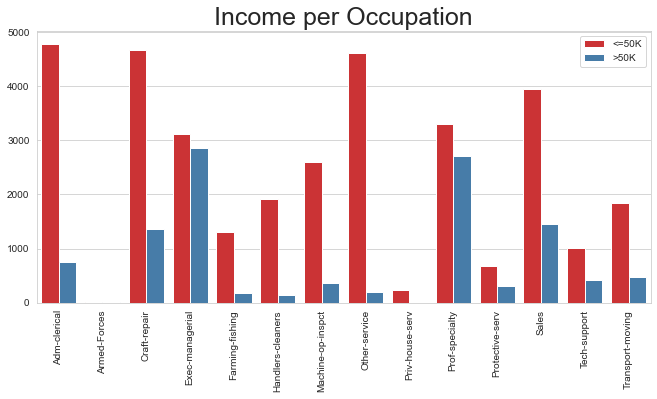

In [43]:
fig = plt.figure(figsize = (11,5))
ax=sns.countplot(data=df, x='Occuptaion', hue = 'Income',palette='Set1')
ax.set_title('Income per Occupation', fontsize=25)

plt.xlabel("Education",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='best')
plt.show()

### What is the distribtuion of work hours perwork class

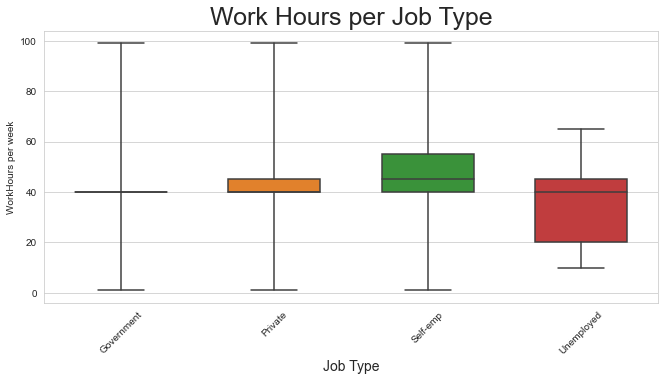

In [44]:
plt.figure(figsize=(11,5))
ax= sns.boxplot(x='WorkClass', y='WorkHours per week', data=df, whis=[0, 100], width=.6)
ax.set_title('Work Hours per Job Type', fontsize=25)


plt.xlabel("Job Type",fontsize = 14);
plt.xticks(rotation=45)
plt.show()

## Logistic Regression

In [45]:
df = pd.get_dummies(data=df, columns=['WorkClass','Generation', 'Education', 'Marital-Status', 'Occuptaion','Relationship', 'Race', 'Income',
                                      'Gender', 'Capital-Gain', 'Capital-Loss','NativeRegion'],drop_first=True)

In [46]:
df.head()

,WorkHours per week,WorkClass_Private,WorkClass_Self-emp,WorkClass_Unemployed,Generation_Gen X,Generation_Gen Z,Generation_Millenial,Generation_Silent,Education_Bachelors,Education_BelowHS,...,Race_Black,Race_Other,Race_White,Income_>50K,Gender_Male,Capital-Gain_Yes,Capital-Loss_Yes,NativeRegion_Europe,NativeRegion_Latin_South_America,NativeRegion_North_America
0,40,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,1
1,13,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,40,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,40,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,40,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df.drop('Income_>50K',axis=1)
y=df['Income_>50K']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression(max_iter= 1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10165
           1       0.71      0.59      0.64      3402

    accuracy                           0.84     13567
   macro avg       0.79      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567

